In [4]:
import pandas as pd
import numpy as np

In [172]:
# Chargement des fichiers CSV
df_education_student = pd.read_excel("C:/Users/Administrator/Desktop/Datathon UNHCR/Hackaton World Data Lab/Data_africa_education_student.xlsx", na_values=["NA", "N/A", "null"])
df_education_unemployed = pd.read_excel("C:/Users/Administrator/Desktop/Datathon UNHCR/Hackaton World Data Lab/Data_africa_education_unemployed.xlsx", na_values=["NA", "N/A", "null"])
df_education_inactive = pd.read_excel("C:/Users/Administrator/Desktop/Datathon UNHCR/Hackaton World Data Lab/Data_africa_education_inactive.xlsx", na_values=["NA", "N/A", "null"])
#...

df_sector_employed = pd.read_excel("C:/Users/Administrator/Desktop/Datathon UNHCR/Hackaton World Data Lab/Data_africa_sector_employed.xlsx", na_values=["NA", "N/A", "null"])
df_rural_urban = pd.read_excel("C:/Users/Administrator/Desktop/Datathon UNHCR/Hackaton World Data Lab/Data_employed_rural_urban.xlsx", na_values=["NA", "N/A", "null"])

In [174]:
print(df_education_student.head())
print(df_education_unemployed.head())
print(df_education_inactive.head())
print(df_sector_employed.head())
print(df_rural_urban.head())


  country  year  age  gender  education   status  sector  sector_group  \
0  Angola  2015   15  female  secondary  student     NaN           NaN   
1  Angola  2015   15  female         no  student     NaN           NaN   
2  Angola  2015   15  female    primary  student     NaN           NaN   
3  Angola  2015   15    male    primary  student     NaN           NaN   
4  Angola  2015   15    male         no  student     NaN           NaN   

   population  urban_rural  informal_formal ccode  
0        8470          NaN              NaN   AGO  
1       20890          NaN              NaN   AGO  
2       51793          NaN              NaN   AGO  
3           0          NaN              NaN   AGO  
4           0          NaN              NaN   AGO  
  country  year  age  gender  education      status  sector  sector_group  \
0  Angola  2015   15  female         no  unemployed     NaN           NaN   
1  Angola  2015   15  female    primary  unemployed     NaN           NaN   
2  Angola  2

In [183]:
# Filtrer uniquement les données pour le Sénégal
df_education_student_senegal = df_education_student[df_education_student['country'] == 'Senegal']
df_education_unemployed_senegal = df_education_unemployed[df_education_unemployed['country'] == 'Senegal']
df_education_inactive_senegal = df_education_inactive[df_education_inactive['country'] == 'Senegal']
df_sector_employed_senegal = df_sector_employed[df_sector_employed['country'] == 'Senegal']
df_rural_urban_senegal = df_rural_urban[df_rural_urban['country'] == 'Senegal']

In [42]:
print(df_unemployed_senegal.head())

       country  year   age  gender  education      status sector  \
87902  Senegal  2015  15.0  female  secondary  unemployed          
87903  Senegal  2015  15.0  female         no  unemployed          
87904  Senegal  2015  15.0  female    primary  unemployed          
87905  Senegal  2015  15.0    male  secondary  unemployed          
87906  Senegal  2015  15.0    male         no  unemployed          

       sector_group  population  urban_rural  informal_formal ccode  
87902           NaN       423.0          NaN              NaN   SEN  
87903           NaN      1207.0          NaN              NaN   SEN  
87904           NaN       433.0          NaN              NaN   SEN  
87905           NaN       771.0          NaN              NaN   SEN  
87906           NaN      1182.0          NaN              NaN   SEN  


### Visualisons la structure des bases

Après diagnostic de la base, on constate que:

-les bases on les memes variables 

-mais on  pourra difficilement modéliser dans un même modèle la situation en emploi  selon le niveau d'éducation et ni le type d'emploi selon le milieu de residence.

car :

    ->les employés sont décrits dans deux bases séparées, l’une par secteur, l’autre par zone, mais sans éducation.
    
    ->les bases avec éducation (étudiants, chômeurs, inactifs) n’ont pas de secteur ou milieu de residence.

Par contre, nous pouvons faire une analyse prospective à partir des dynamiques d’emploi des jeunes par âge, genre et secteur, pour etudier l'“Insertion sectorielle des jeunes en emploi : quels secteurs pour l’avenir au Senegal”.


Pour cela , nous utiliserons les donnees du senegal de la base "Data_africa_sector_employed"


# Traitement des données

## 1. Verification du format des variables et de leurs contenus

In [200]:
# Afficher les types de chaque colonne
print(df_sector_employed_senegal.dtypes)

country             object
year                 int64
age                  int64
gender              object
education          float64
status              object
sector              object
sector_group        object
population           int64
urban_rural        float64
informal_formal    float64
ccode               object
dtype: object


A ce niveau on verifie que les colonne numerique ne contiennent pas de chaine de caractere. Il s'agit de year, age

In [210]:
# Colonne à vérifier
col = "year" # age population 
# Afficher les valeurs non convertibles en nombre (entier ou float)
non_numeric = df_sector_employed_senegal[~df_sector_employed_senegal[col].astype(str).str.match(r'^-?\d+$')] 

print("Valeurs non entières détectées dans la colonne 'year' :")
print(non_numeric[[col]])


Valeurs non entières détectées dans la colonne 'year' :
Empty DataFrame
Columns: [year]
Index: []


A present, nous regardons les modalites de chqaue variable pour s'assurer qu'il n'y a pas des incoherences ou des defauts a nettoyer, et le faire le cas echeant. Par exemple pas deux modalité qui renvoi a la meme chose mais qui different juste par la maniere d'etre ecrite.

In [227]:
for col in df_sector_employed_senegal.columns:
    uniques = df_sector_employed_senegal[col].dropna().unique()
    print(f"🧾 {col} : {len(uniques)} modalité(s)")
    print(uniques)
    print("-" * 40)


🧾 country : 1 modalité(s)
['Senegal']
----------------------------------------
🧾 year : 16 modalité(s)
[2015 2016 2017 2018 2019 2020 2021 2022 2023 2024 2025 2026 2027 2028
 2029 2030]
----------------------------------------
🧾 age : 21 modalité(s)
[17 18 23 16 24 19 15 20 22 21 26 32 28 33 29 25 30 34 31 35 27]
----------------------------------------
🧾 gender : 2 modalité(s)
['female' 'male']
----------------------------------------
🧾 education : 0 modalité(s)
[]
----------------------------------------
🧾 status : 1 modalité(s)
['employed']
----------------------------------------
🧾 sector : 14 modalité(s)
['Wholesale and retail trade; repair of motor vehicles and motorcycles'
 'Accommodation and food service activities'
 'Agriculture; forestry and fishing' 'Other services' 'Education'
 'Public administration and defence; compulsory social security'
 'Financial and insurance activities' 'Mining and quarrying'
 'Construction' 'Transport; storage and communication' 'Utilities'
 'Real 

On peut constater que les variables objects n'ont pas de problemes de similitudes de sens entre modalités ( sector, sector_group, statut,etc). les variables numeriques en outre semble ne pas contenir de chaine et le format est convenable. nous pouvons donc passer a la detection des doublons.

## 2. Les doublons

### Voir les lignes dupliquées (identiques sur toutes les colonnes)

In [214]:

df_sector_employed_senegal[df_sector_employed_senegal.duplicated(keep=False)].sort_values(by=list(df_sector_employed_senegal.columns))

,country,year,age,gender,education,status,sector,sector_group,population,urban_rural,informal_formal,ccode


Donc il n'y a pas de doublons.

...

## 2. Valeurs manquantes

### Evaluons les valeurs manquantes

Nous ici construisons la fonction qui permet d'evaluer les valeurs manquantes au sein des differentes bases de données

In [217]:
# Étape 1 : Identification des variables avec valeurs manquantes
def afficher_valeurs_manquantes(df, nom_df="dataframe"):
    """
    Affiche les colonnes de df contenant des valeurs manquantes ainsi que le nombre 
    et le pourcentage de valeurs manquantes pour chacune:contentReference[oaicite:0]{index=0}.
    """
    total_lignes = df.shape[0]
    print(f"Valeurs manquantes dans {nom_df} :")
    for col in df.columns:
        nb_na = df[col].isna().sum()
        if nb_na > 0:
            pourcentage = 100 * nb_na / total_lignes
            print(f" - {col} : {nb_na} NA ({pourcentage:.2f} %)")
    # S'il n'y a pas de valeurs manquantes :
    if df.isna().sum().sum() == 0:
        print("Aucune valeur manquante détectée dans ce dataframe.")


Lorsqu'on l'applique ci-dessous, on peut observer  4 variables comprenant des valeurs manquantes, chacune pour toute les modalités. Apres diagnostic des variables, il n'existe pas de variable filtre. Celle ci seront simplement retirer.

In [219]:
afficher_valeurs_manquantes(df_sector_employed_senegal, nom_df="la base etudiants")

Valeurs manquantes dans la base etudiants :
 - education : 9408 NA (100.00 %)
 - urban_rural : 9408 NA (100.00 %)
 - informal_formal : 9408 NA (100.00 %)


Nous nettoyons la base des variables inutiles pour la suite

In [232]:
df_sector_employed_senegal = df_sector_employed_senegal.drop(columns=["education", "urban_rural", "informal_formal"])

In [235]:
afficher_valeurs_manquantes(df_sector_employed_senegal, nom_df="la base etudiants")

Valeurs manquantes dans la base etudiants :
Aucune valeur manquante détectée dans ce dataframe.


Notre base ne contient plus de NA

In [238]:
print(df_sector_employed_senegal.head())

        country  year  age  gender    status  \
329280  Senegal  2015   17  female  employed   
329281  Senegal  2015   17  female  employed   
329282  Senegal  2015   17  female  employed   
329283  Senegal  2015   17  female  employed   
329284  Senegal  2015   17  female  employed   

                                                   sector sector_group  \
329280  Wholesale and retail trade; repair of motor ve...     Services   
329281          Accommodation and food service activities     Services   
329282                  Agriculture; forestry and fishing  Agriculture   
329283                                     Other services     Services   
329284                                          Education     Services   

        population ccode  
329280        6352   SEN  
329281         707   SEN  
329282        9660   SEN  
329283       13130   SEN  
329284         592   SEN  


In [356]:
df_sector_employed_senegal.to_excel("C:/Users/Administrator/Desktop/Datathon UNHCR/Hackaton World Data Lab/emploi_jeunes_senegal.xlsx", index=False)


# Statistiques descriptives

In [263]:
# Statistiques descriptives par année, genre et secteur_group
sector_summary = (
    df_sector_employed_senegal.groupby(["year", "gender", "sector_group"])
    .agg(total_employed=("population", "sum"))
    .reset_index()
)

# Répartition sectorielle annuelle tous genres confondus
sector_total = (
    df_sector_employed_senegal.groupby(["year", "sector_group"])
    .agg(total_employed=("population", "sum"))
    .reset_index()
)

# Affichage du rendu 
print(sector_summary.head())
print(sector_total.head())


   year  gender sector_group  total_employed
0  2015  female  Agriculture          203156
1  2015  female     Industry           88701
2  2015  female     Services          469121
3  2015    male  Agriculture          431384
4  2015    male     Industry          311647
   year sector_group  total_employed
0  2015  Agriculture          634540
1  2015     Industry          400348
2  2015     Services          971859
3  2016  Agriculture          827290
4  2016     Industry          453756


In [267]:
!pip install XlsxWriter

Defaulting to user installation because normal site-packages is not writeable


In [269]:
with pd.ExcelWriter("C:/Users/Administrator/Desktop/Datathon UNHCR/Hackaton World Data Lab/rendu_sectoriel.xlsx", engine="xlsxwriter") as writer:
    sector_summary.to_excel(writer, sheet_name="Résumé par genre", index=False)
    sector_total.to_excel(writer, sheet_name="Résumé total", index=False)


...

Nous commencons par visualiser l'evolution de l'emploi au senegal et les anticipations a l'horizon 2030

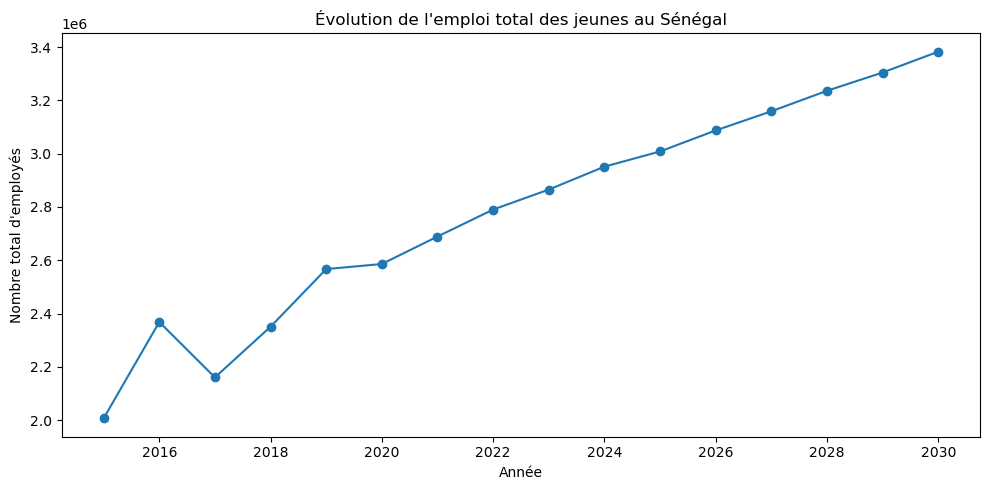

In [281]:
import matplotlib.pyplot as plt

# 1. Taille totale de l’emploi jeune par an
total_emploi_annuel = df_sector_employed_senegal.groupby("year")["population"].sum().reset_index(name="total_employed")

#  Évolution de l'emploi total des jeunes
plt.figure(figsize=(10, 5))
plt.plot(total_emploi_annuel["year"], total_emploi_annuel["total_employed"], marker='o')
plt.title("Évolution de l'emploi total des jeunes au Sénégal")
plt.xlabel("Année")
plt.ylabel("Nombre total d'employés")
plt.grid(False)
plt.tight_layout()

# Exporter la figure avant de l'afficher
plt.savefig("C:/Users/Administrator/Desktop/Datathon UNHCR/Hackaton World Data Lab/emploi_jeunes_senegal.png", dpi=300)  

plt.show()



Il apparait interessant d'observer comment cette tendance a la hausse s'effectue a travers les secteurs d'activités

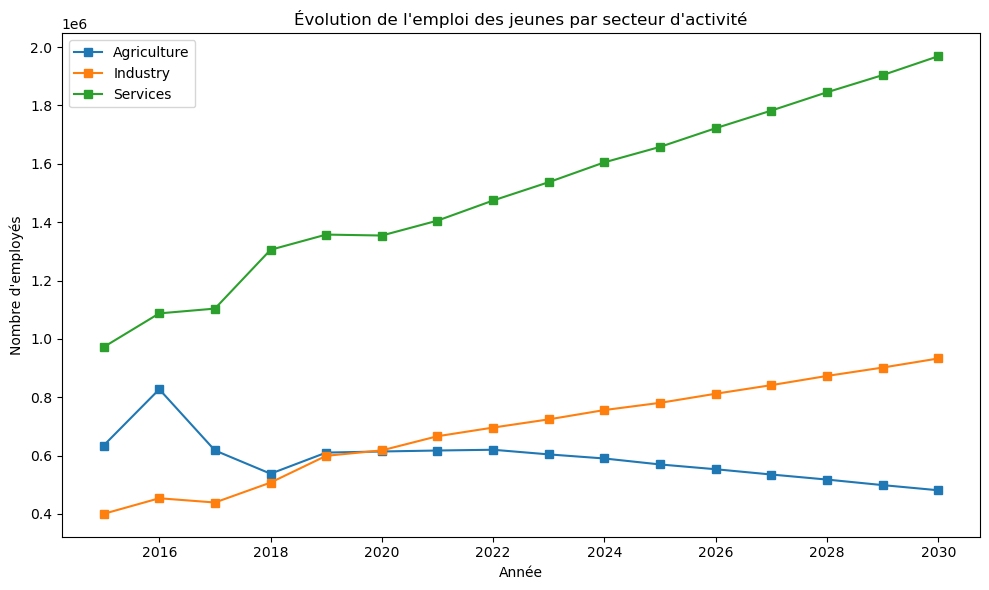

In [291]:
# 2. Répartition par secteur_group et année


emploi_par_secteur = df_sector_employed_senegal.groupby(["year", "sector_group"])["population"].sum().reset_index(name="total_employed")


plt.figure(figsize=(10, 6))
for sector in emploi_par_secteur["sector_group"].unique():
    subset = emploi_par_secteur[emploi_par_secteur["sector_group"] == sector]
    plt.plot(subset["year"], subset["total_employed"], marker='s', label=sector)

plt.title("Évolution de l'emploi des jeunes par secteur d'activité")
plt.xlabel("Année")
plt.ylabel("Nombre d'employés")
plt.legend()
plt.grid(False)
plt.tight_layout()

# Exporter la figure avant de l'afficher
plt.savefig("C:/Users/Administrator/Desktop/Datathon UNHCR/Hackaton World Data Lab/emploi_secteur_senegal.png", dpi=300)  

plt.show()


In [303]:
import seaborn as sns

<Figure size 1200x600 with 0 Axes>

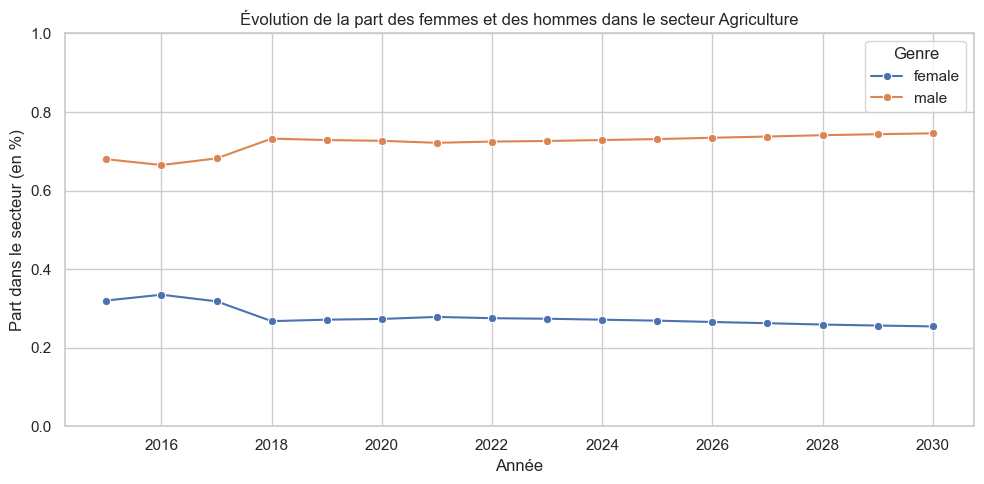

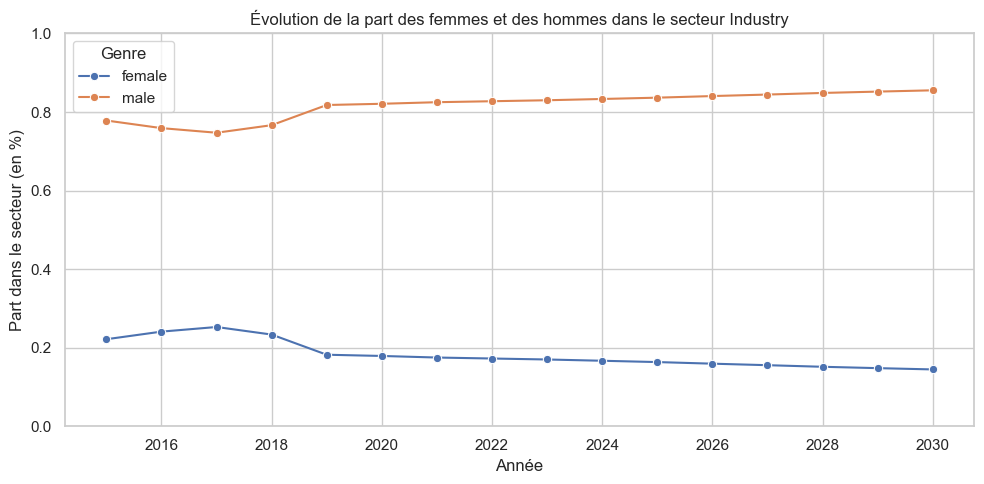

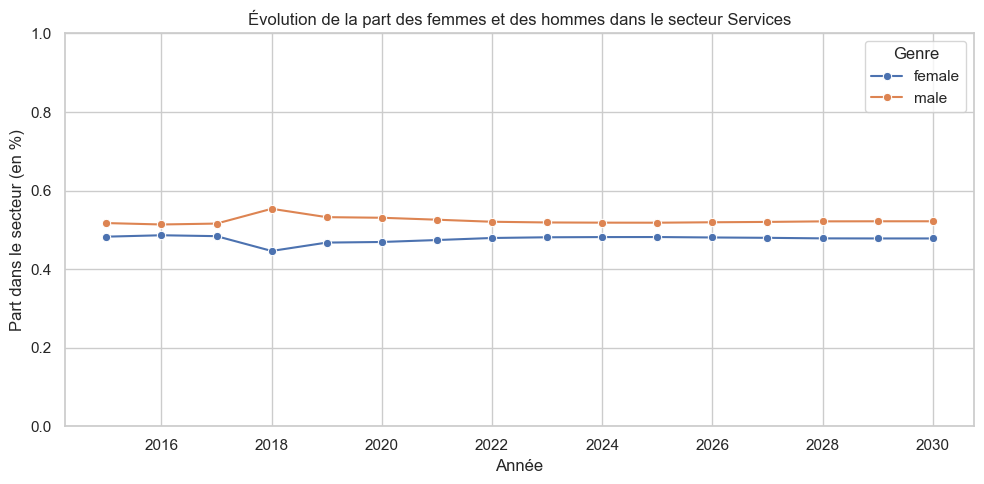

In [305]:
# Aggrégation annuelle par genre et secteur_group
grouped = df_sector_employed_senegal.groupby(["year", "sector_group", "gender"])["population"].sum().reset_index()

# Calcul du total annuel par secteur pour calculer les parts
total_by_year_sector = grouped.groupby(["year", "sector_group"])["population"].sum().reset_index(name="total_sector")

# Fusion pour obtenir les parts
merged = pd.merge(grouped, total_by_year_sector, on=["year", "sector_group"])
merged["share"] = merged["population"] / merged["total_sector"]

# Visualisation de l'évolution temporelle des parts de femmes et hommes dans chaque secteur
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

for sector in merged["sector_group"].unique():
    plt.figure(figsize=(10, 5))
    subset = merged[merged["sector_group"] == sector]
    sns.lineplot(data=subset, x="year", y="share", hue="gender", marker="o")
    plt.title(f"Évolution de la part des femmes et des hommes dans le secteur {sector}")
    plt.ylabel("Part dans le secteur (en %)")
    plt.xlabel("Année")
    plt.ylim(0, 1)
    plt.legend(title="Genre")
    plt.tight_layout()
    plt.grid(False)
    plt.show()

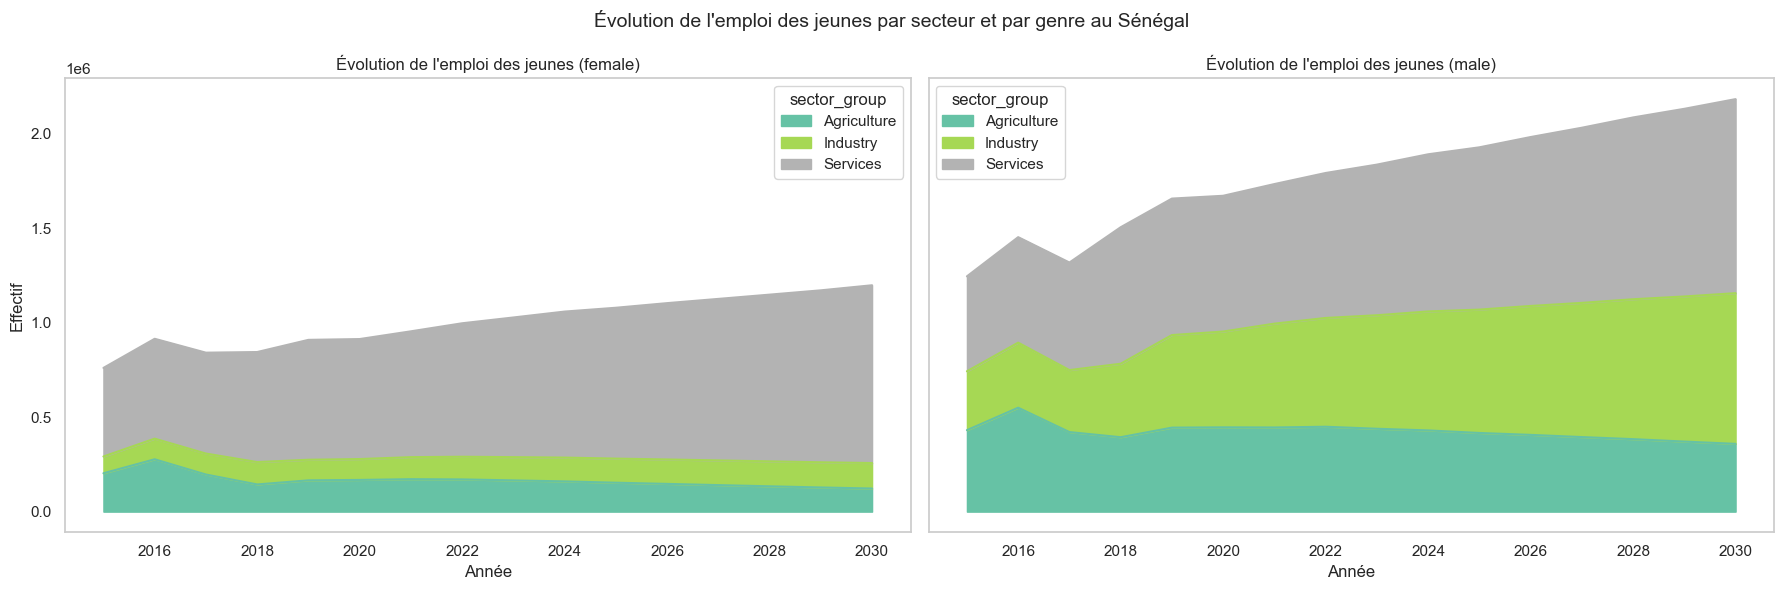

In [332]:
# --- Préparation aire empilée par genre ---
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)
genders = df_sector_employed_senegal["gender"].unique()

for i, g in enumerate(genders):
    subset = df_sector_employed_senegal[df_sector_employed_senegal["gender"] == g]
    pivot = subset.pivot_table(index="year", columns="sector_group", values="population", aggfunc="sum")
    pivot.plot(kind="area", stacked=True, colormap="Set2", ax=axes[i])
    axes[i].set_title(f"Évolution de l'emploi des jeunes ({g})")
    axes[i].set_xlabel("Année")
    axes[i].set_ylabel("Effectif")
    axes[i].grid(False)

plt.suptitle("Évolution de l'emploi des jeunes par secteur et par genre au Sénégal", fontsize=14)
plt.tight_layout()

#  Export du graphique AVANT plt.show()
plt.savefig("C:/Users/Administrator/Desktop/Datathon UNHCR/Hackaton World Data Lab/emploi_jeunes_genre_secteurs.png", dpi=300)
plt.show()

comment est ce qu'evolue l'ecart en terme de representation dans les emplois entre les femmes et les hommes, suivant les differents secteurs?

...

Et bien on peut constater que les disparité s'aggrave en piont de pourcentage dans le secteur agricole et industriel, notamment a cause de la dimitution non negligeable des emplois feminin dans le secteur agricole.

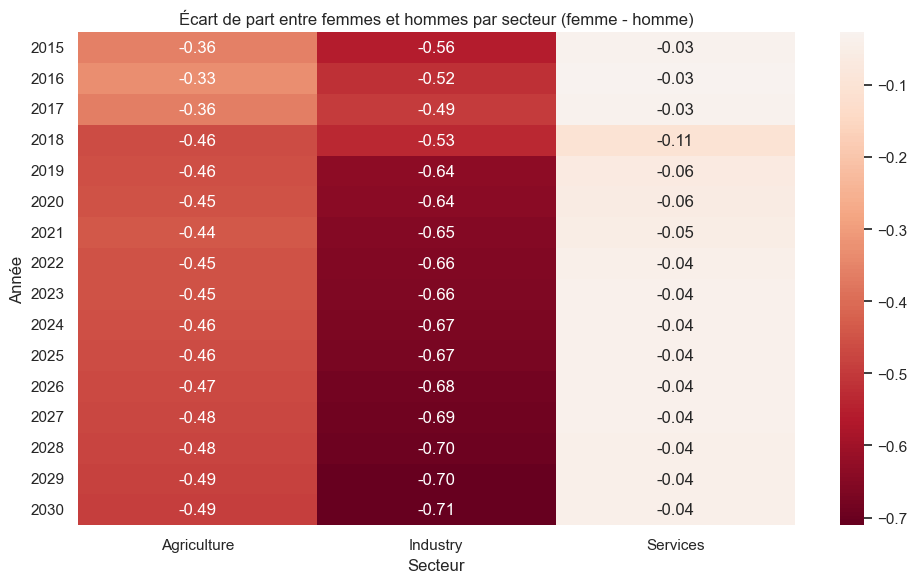

In [323]:
# Calcul de l’écart homme - femme par secteur et année
pivot_h = merged[merged["gender"] == "male"].pivot(index="year", columns="sector_group", values="share")
pivot_f = merged[merged["gender"] == "female"].pivot(index="year", columns="sector_group", values="share")
ecart = pivot_f - pivot_h

plt.figure(figsize=(10, 6))
sns.heatmap(ecart, annot=True, fmt=".2f", cmap="RdBu", center=0)
plt.title("Écart de part entre femmes et hommes par secteur (femme - homme)")
plt.xlabel("Secteur")
plt.ylabel("Année")
plt.tight_layout()
plt.show()


# Modelisation

## Modèle logit multinomial dynamique  + prévision)

### principe

Le principe du modèle est de prédire la probabilité qu’un jeune soit employé dans un secteur donné en fonction du temps (année) et de caractéristiques comme le genre. Le modèle garantit que les parts sectorielles restent toujours entre 0 et 100 %, et qu’elles totalisent exactement 100 %.

### Mise en condition de la base

Nous regroupons ici les donnees par secteur et par genre , pour chaque année . Cela nous permet de determiner la variable cible, a savoir les parts d'emploi generé par chaque secteur dans le total des emplois générés dans le pays.

In [415]:
# 3. Agréger la population par année, secteur et genre
df_grouped = df_sector_employed_senegal.groupby(['year', 'sector_group', 'gender'])['population'].sum().reset_index()

# 4. Calcul des proportions sectorielles
df_total = df_grouped.groupby(['year', 'gender'])['population'].sum().reset_index().rename(columns={'population': 'total'})
df_merged = pd.merge(df_grouped, df_total, on=['year', 'gender'])
df_merged['part'] = df_merged['population'] / df_merged['total']


 

In [393]:
df_merged.head()

,year,sector,gender,population,total,part
0,2015,Accommodation and food service activities,female,17273,760978,0.022698
1,2015,Accommodation and food service activities,male,11882,1245769,0.009538
2,2015,Agriculture; forestry and fishing,female,203156,760978,0.266967
3,2015,Agriculture; forestry and fishing,male,431384,1245769,0.346279
4,2015,Construction,female,1935,760978,0.002543


In [373]:
# les bibliothèques necessaires pour la suite
import statsmodels.api as sm
from patsy import dmatrices

In [417]:
# 5. Préparer les données pour le modèle logit multinomial
df_model = df_merged.copy()
df_model['year_c'] = df_model['year'] - df_model['year'].min()  # centrage de l'année
#df_model['gender'] = df_model['gender'].astype('category')
#df_model['sector_group'] = df_model['sector_group'].astype('category')

# 6. Créer les variables explicatives (patsy)
y, X = dmatrices('sector_group ~ year_c + gender', data=df_model, return_type='dataframe')



### estimation

In [433]:
!pip install dirichlet

Defaulting to user installation because normal site-packages is not writeable


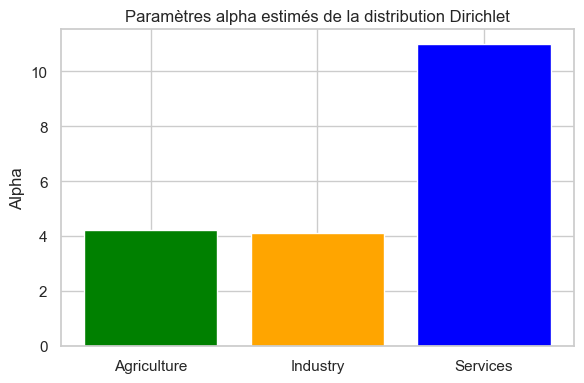

In [441]:
# Installer py-dirmod si non installé : !pip install dirichlet

from dirichlet import mle
from sklearn.preprocessing import OneHotEncoder



# Agréger la population par année, secteur et genre
df_grouped = df.groupby(['year', 'sector_group', 'gender'])['population'].sum().reset_index()

# Calculer la part sectorielle
df_total = df_grouped.groupby(['year', 'gender'])['population'].sum().reset_index().rename(columns={'population': 'total'})
df_merged = df_grouped.merge(df_total, on=['year', 'gender'])
df_merged['part'] = df_merged['population'] / df_merged['total']

# Pivot des données pour obtenir les parts dans chaque secteur
df_pivot = df_merged.pivot_table(index=['year', 'gender'], columns='sector_group', values='part').reset_index()
df_pivot = df_pivot.dropna()  # enlever lignes incomplètes
df_pivot.columns.name = None

# Centrer l'année
df_pivot['year_c'] = df_pivot['year'] - df_pivot['year'].min()

# Encoder le genre (one-hot)
encoder = OneHotEncoder(drop='first', sparse_output=False)

sex_encoded = encoder.fit_transform(df_pivot[['gender']])
sex_df = pd.DataFrame(sex_encoded, columns=encoder.get_feature_names_out(['gender']))
df_final = pd.concat([df_pivot, sex_df], axis=1)

# Sélection des features
X = df_final[['year_c'] + list(sex_df.columns)]

# Réponse : matrice de proportions (agriculture, industry, services)
Y = df_final[['Agriculture', 'Industry', 'Services']].values

# Ajustement du modèle Dirichlet (simple MLE pour estimation des alpha moyens)
alpha_hat = mle(Y)

# Visualisation des alpha estimés
fig, ax = plt.subplots(figsize=(6, 4))
sectors = ['Agriculture', 'Industry', 'Services']
ax.bar(sectors, alpha_hat, color=['green', 'orange', 'blue'])
ax.set_title("Paramètres alpha estimés de la distribution Dirichlet")
ax.set_ylabel("Alpha")
plt.tight_layout()

plt.savefig("C:/Users/Administrator/Desktop/Datathon UNHCR/Hackaton World Data Lab/dirichlet_secteurs.png", dpi=300)
plt.show()


In [443]:
alpha_hat

array([ 4.20902784,  4.11471688, 10.97611042])

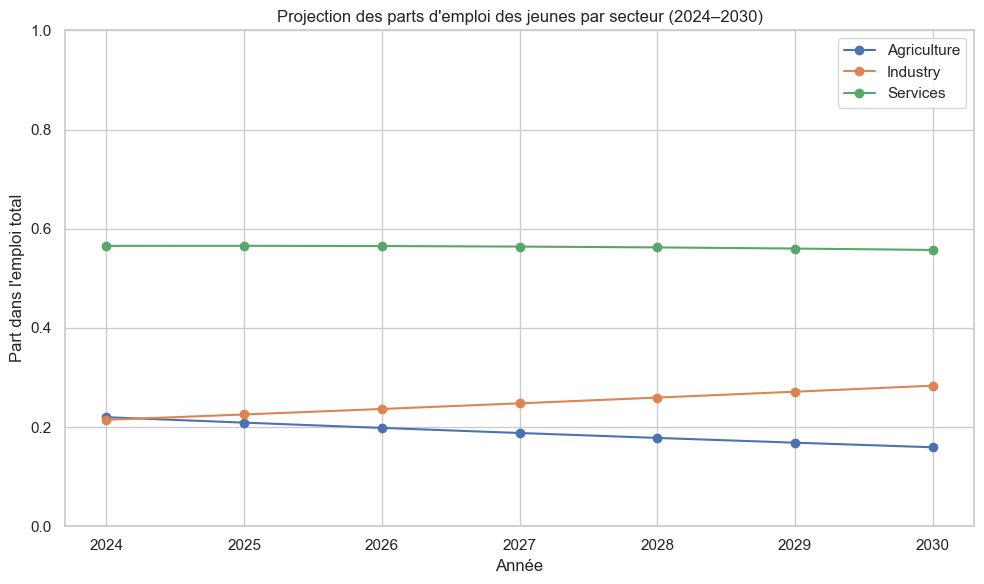

,Year,Agriculture,Industry,Services
0,2024,0.219895,0.214660,0.565445
1,2025,0.208955,0.225452,0.565593
2,2026,0.198344,0.236529,0.565127
3,2027,0.188068,0.247882,0.564050
4,2028,0.178131,0.259500,0.562368
5,2029,0.168539,0.271371,0.560089
6,2030,0.159293,0.283482,0.557224


In [447]:

# Paramètres alpha initiaux estimés (2024)
alpha_2024 = np.array([4.2, 4.1, 10.8])
sectors = ['Agriculture', 'Industry', 'Services']

# Nombre d'années de projection (2025 à 2030)
years = np.arange(2025, 2031)

# Supposons un scénario où l'industrie est favorisée (croît de 5% par an), services restent stables, agriculture décroît

growth_rates_alt = np.array([0.90, 1.10, 1.05])  # Agriculture baisse de 10%, industrie augmente de 10%, services de 5%
  # agriculture diminue, industrie augmente, services stables

# Générer alpha_t pour chaque année
alpha_projection = [alpha_2024]
for year in years:
    alpha_next = alpha_projection[-1] * growth_rates
    alpha_projection.append(alpha_next)

# Convertir les alphas en parts projetées (alpha_j / sum(alpha))
parts_projection = [alpha / alpha.sum() for alpha in alpha_projection]

# Transformer en DataFrame
df_proj = pd.DataFrame(parts_projection, columns=sectors)
df_proj['Year'] = np.append([2024], years)
df_proj = df_proj.set_index('Year')

# Tracer l'évolution des parts
df_proj.plot(marker='o', figsize=(10, 6))
plt.title("Projection des parts d'emploi des jeunes par secteur (2024–2030)")
plt.ylabel("Part dans l'emploi total")
plt.xlabel("Année")
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()

df_proj.reset_index()
